## Data Cleaning

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data.csv')
df.head()

,HADM_ID,TEXT,SUBJECT_ID,ICD9_V58,ICD9_427,ICD9_E87,ICD9_403,ICD9_401,ICD9_584,ICD9_414,...,ICD9_285,ICD9_V10,ICD9_428,ICD9_250,ICD9_038,ICD9_V30,ICD9_530,ICD9_272,ICD9_518,ICD9_276
0,100001,Admission Date: [**2117-9-11**] ...,58526,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,100003,Admission Date: [**2150-4-17**] ...,54610,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,100006,Admission Date: [**2108-4-6**] Discharg...,9895,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,100007,Admission Date: [**2145-3-31**] ...,23018,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,100009,Admission Date: [**2162-5-16**] ...,533,1,0,0,0,1,0,1,...,1,0,0,1,0,0,0,1,0,0


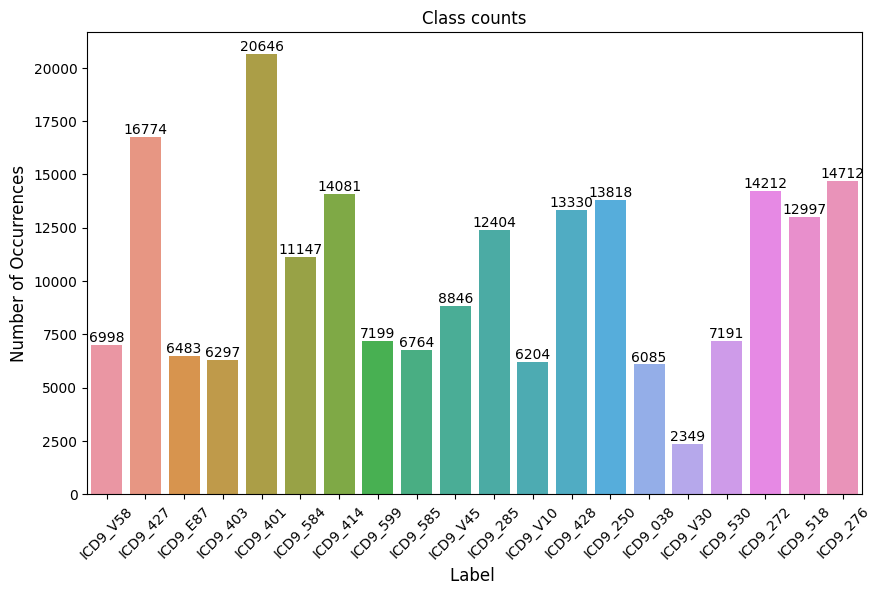

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

x = df.iloc[:, 3:].sum()
plt.figure(figsize=(10,6))
ax = sns.barplot(x=x.index, y=x.values)
plt.xticks(rotation=45)
plt.title("Class counts")
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Label ', fontsize=12)

rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

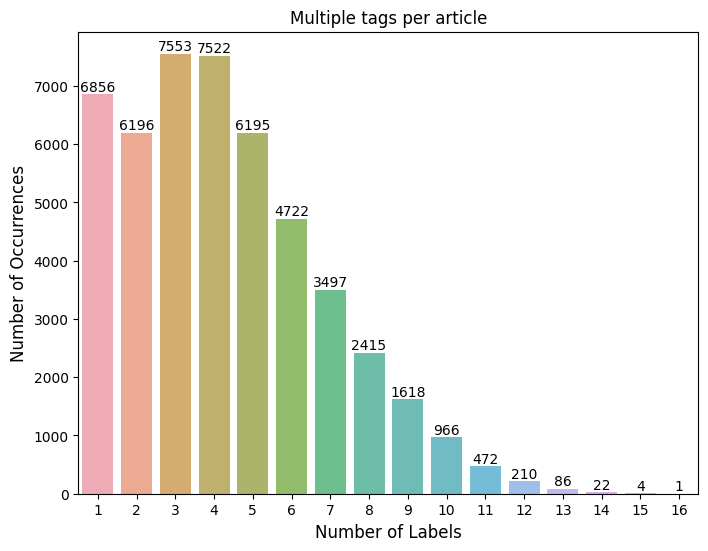

In [3]:
x = df.iloc[:, 3:].sum(axis=1)  
distribution = x.value_counts().sort_index()

plt.figure(figsize=(8,6))
ax = sns.barplot(x=distribution.index, y=distribution.values, alpha=0.8)
plt.title("Multiple tags per article")
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of Labels', fontsize=12)

rects = ax.patches
labels = distribution.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha='center', va='bottom')

plt.show()

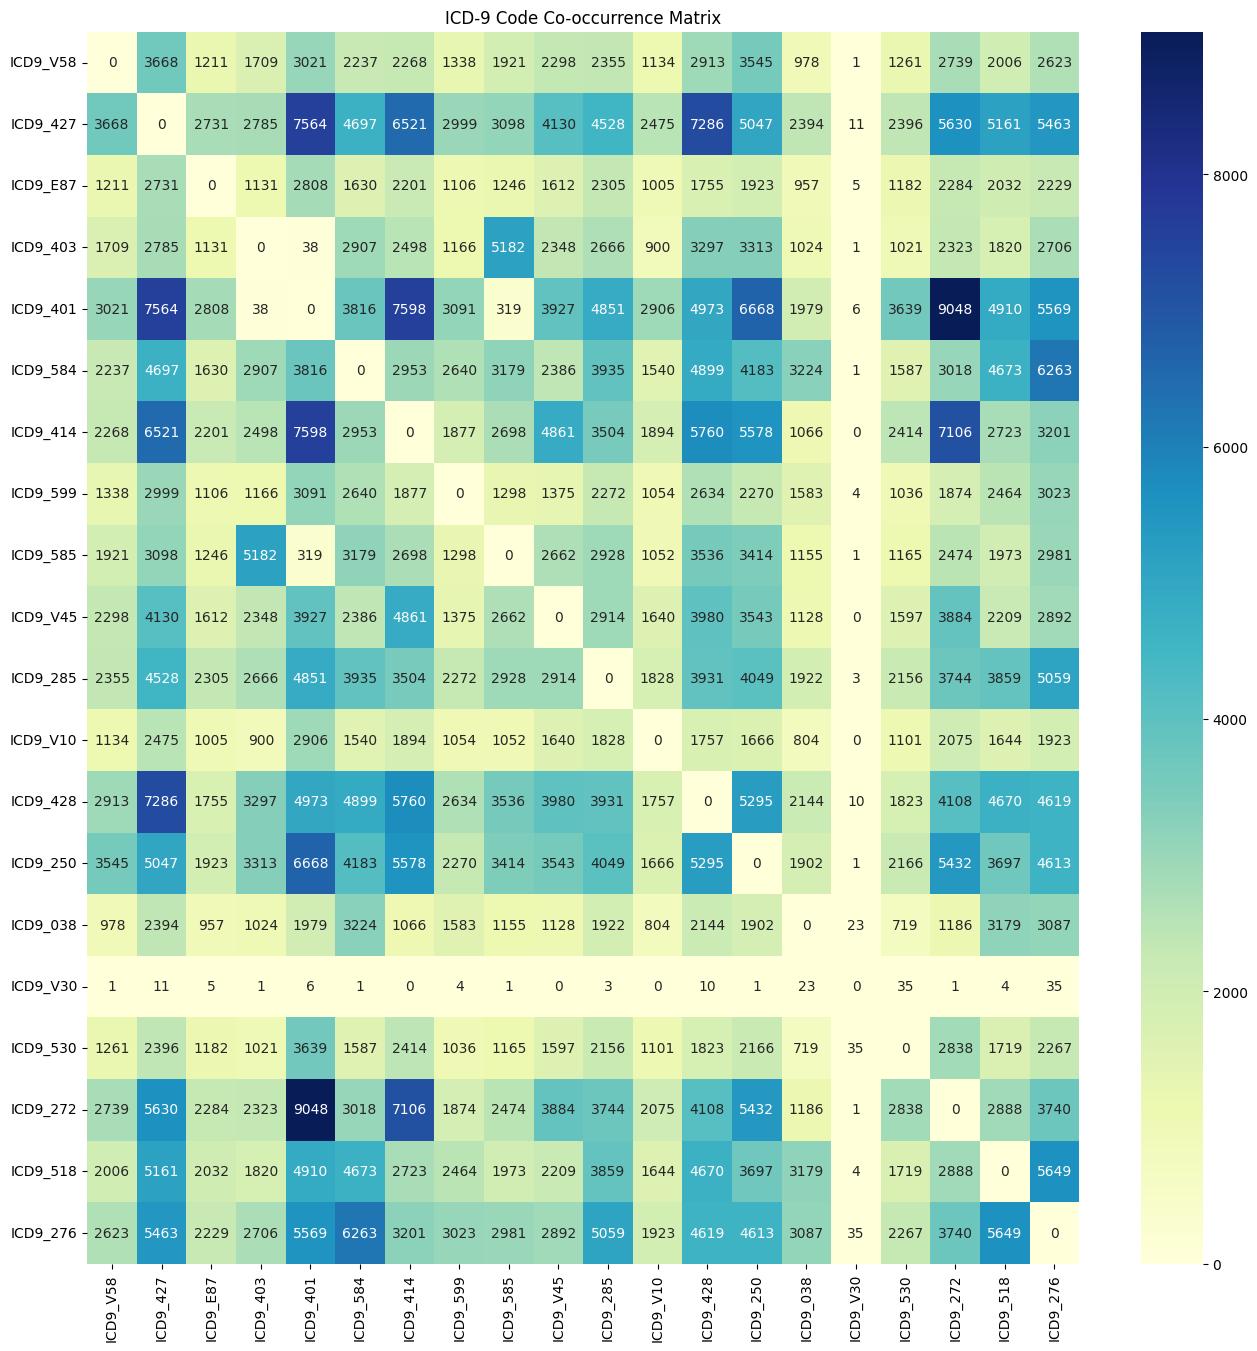

In [4]:
x = df.iloc[:, 3:]

co_occurrence_matrix = x.T.dot(x)

np.fill_diagonal(co_occurrence_matrix.values, 0)

plt.figure(figsize=(16, 16))  
sns.heatmap(co_occurrence_matrix, annot=True, cmap="YlGnBu", fmt="d")
plt.title("ICD-9 Code Co-occurrence Matrix")

plt.savefig("fig4.png", bbox_inches='tight')
plt.show()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48335 entries, 0 to 48334
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   HADM_ID     48335 non-null  int64 
 1   TEXT        48335 non-null  object
 2   SUBJECT_ID  48335 non-null  int64 
 3   ICD9_V58    48335 non-null  int64 
 4   ICD9_427    48335 non-null  int64 
 5   ICD9_E87    48335 non-null  int64 
 6   ICD9_403    48335 non-null  int64 
 7   ICD9_401    48335 non-null  int64 
 8   ICD9_584    48335 non-null  int64 
 9   ICD9_414    48335 non-null  int64 
 10  ICD9_599    48335 non-null  int64 
 11  ICD9_585    48335 non-null  int64 
 12  ICD9_V45    48335 non-null  int64 
 13  ICD9_285    48335 non-null  int64 
 14  ICD9_V10    48335 non-null  int64 
 15  ICD9_428    48335 non-null  int64 
 16  ICD9_250    48335 non-null  int64 
 17  ICD9_038    48335 non-null  int64 
 18  ICD9_V30    48335 non-null  int64 
 19  ICD9_530    48335 non-null  int64 
 20  ICD9_2

## Text Cleaning

In [5]:
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [6]:
text_lengths = np.array([ len(text_sample) for text_sample in df['TEXT'] ])

print(f"Max Text Plot Length: {np.max(text_lengths)}")
print(f"Median Text Plot Length: {np.median(text_lengths)}")
print(f"Min Text Plot Length: {np.min(text_lengths)}")

Max Text Plot Length: 55728
Median Text Plot Length: 9819.0
Min Text Plot Length: 215


In [7]:
df['TEXT'][10]

"Admission Date:  [**2142-11-30**]              Discharge Date:   [**2142-12-10**]\n\nDate of Birth:  [**2084-5-2**]             Sex:   M\n\nService: MEDICINE\n\nAllergies:\nPercocet / Bactrim Ds / Lisinopril\n\nAttending:[**First Name3 (LF) 898**]\nChief Complaint:\nhypotension\n\nMajor Surgical or Invasive Procedure:\nnone\n\nHistory of Present Illness:\nMr. [**Known lastname 25925**] is a 58 yo m w/ multiple sclerosis and seizure\ndisorder who presented to an OSH for delusions and AMS x 2 days.\nAt OSH, he was noted to have a Na of 124. He does have a history\nof hyponatremia; he had a Na of 117 in [**2-27**] but had been in the\nmid 130s since then. He has seen nephrology. At the OSH, he had\nan approx 45sec generalized tonic clonic seizure, received 1mg\nAtivan, and transferred to the ED at [**Hospital1 18**]. He also has a\nhistory of seizures especially in the setting of infection and\nhyponatremia. It is unclear if he has had seizures without an\ninciting event. He is currently

In [34]:
def text_lowercase(text):
    return text.lower()

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
    
def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result

def remove_bracket(text):
    return re.sub('\[[^]]*\]', '', text)
    
def remove_special_characters(text):
    text = text.replace('-', ' ')  
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub(r"\n+", " ", text)
    return text

def remove_placeholders(text):
    return re.sub(r"\[\*\*.*?\*\*\]", "", text) 


def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    word_tokens = [word for word in word_tokens if word not in stop_words]
    text = ' '.join(word_tokens) # rejoin tokens into a single string
    return text

In [35]:
def clean_text(text):
    text = text_lowercase(text)
    text = remove_placeholders(text)
    text = remove_bracket(text)
    text = remove_numbers(text)
    text = remove_special_characters(text)
    text = remove_punctuation(text)
    text = remove_stopwords(text) 
    return text      

In [36]:
df['TEXT'] = df['TEXT'].apply(clean_text)

In [21]:
df['TEXT'][100]

'admission date discharge date date birth sex service medicine allergies keflex penicillins erythromycin base demerol ceclor attending chief complaint sob major surgical invasive procedure none history present illness yo woman recurrent pes filter gib anticoagulated copd discharged treated new pe presented ed sob productive cough readmitted found multifocal pneumonia treated levo flagyl vanco cultures positive mrsa levo flagyl continued suspected aspiration pna pt recovered quickly since admission back home o2 requirement getting bridged anticoagulation lovenox starting preparation discharge however developed severe abdominal pain palpable mass abdomen ct showed new large hematoma muscles left anterior lateral lower abdominal pelvic wall without intraperitoneal retroperitoneal extent associated mass effect lower abdominal pelvic bowel loops surgery suggested intervention monitoring hct dropped points setting remained hemodynamically stable tachycardia present throughout hospital stay r

In [22]:
text_lengths = np.array([ len(text_sample) for text_sample in df['TEXT'] ])

print(f"Max Text Plot Length: {np.max(text_lengths)}")
print(f"Median Text Plot Length: {np.median(text_lengths)}")
print(f"Min Text Plot Length: {np.min(text_lengths)}")

Max Text Plot Length: 37743
Median Text Plot Length: 6497.0
Min Text Plot Length: 61


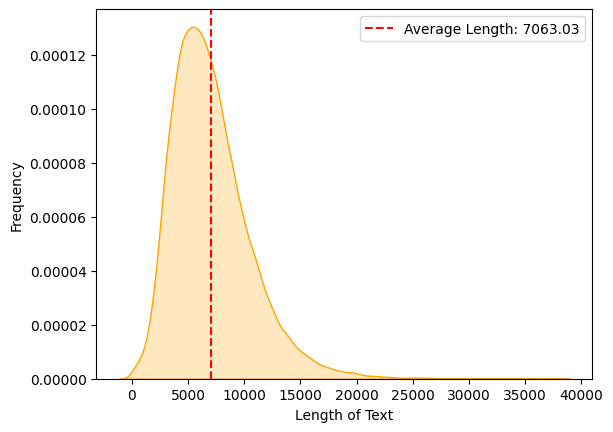

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

text_lengths = np.array([ len(text_sample) for text_sample in df['TEXT'] ])
average_length = np.mean(text_lengths)

sns.kdeplot(text_lengths, color='orange', fill=True)
plt.axvline(average_length, color='red', linestyle='--', label=f'Average Length: {average_length:.2f}')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')

plt.legend(loc='upper right')
plt.show()

## Multi-Label Accuracy

In [37]:
def multi_label_accuracy(y_true, y_pred):
    """
    Calculate multi-label accuracy.
    
    Args:
        y_true (pd.DataFrame or np.ndarray): True binary labels.
        y_pred (pd.DataFrame or np.ndarray): Predicted binary labels.
        
    Returns:
        float: Multi-label accuracy.
    """
    # Convert DataFrame to NumPy array if needed
    if isinstance(y_true, pd.DataFrame):
        y_true = y_true.values
    if isinstance(y_pred, pd.DataFrame):
        y_pred = y_pred.values
    
    n_samples = y_true.shape[0]
    accuracy_sum = 0.0
    
    for i in range(n_samples):
        true_set = set(np.where(y_true[i])[0])
        pred_set = set(np.where(y_pred[i])[0])
        
        intersection = len(true_set & pred_set)
        union = len(true_set | pred_set)
        
        if union == 0:
            accuracy_sum += 1.0
        else:
            accuracy_sum += intersection / union
    
    return accuracy_sum / n_samples

## Text Vectorization

In [38]:
X = df['TEXT']
y = df.iloc[:, 3:]

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

print("Number of Observations in the Data set:" , X.values.shape[0]) 
print("Number of Observations in Train set:", X_train.shape[0])
print("Number of Observations in Test set:" , X_test.shape[0])   

Number of Observations in the Data set: 48335
Number of Observations in Train set: 33834
Number of Observations in Test set: 14501


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=20000)

X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [41]:
feature_names = vectorizer.get_feature_names_out()
feature_names

array(['aa', 'aaa', 'aad', ..., 'zyprexa', 'zyrtec', 'zyvox'],
      dtype=object)

## Logistic Regression

In [42]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression

clf = MultiOutputClassifier(LogisticRegression(max_iter=1000, random_state=42)).fit(X_train_vectorized, y_train)

In [43]:
y_pred = clf.predict(X_test_vectorized)

In [44]:
from sklearn.metrics import hamming_loss, f1_score, accuracy_score, jaccard_score

lr_jaccard_micro = jaccard_score(y_test, y_pred, average="micro")
lr_jaccard_macro = jaccard_score(y_test, y_pred, average="macro")

lr_hamming_loss = hamming_loss(y_test, y_pred)
lr_accuracy = accuracy_score(y_test, y_pred)

lr_f1_micro = f1_score(y_test, y_pred, average='micro')
lr_f1_macro = f1_score(y_test, y_pred, average='macro')

print("Jaccard Score (micro):", lr_jaccard_micro)
print("\nJaccard Score (macro):", lr_jaccard_macro)
print("\nAccuracy:", lr_accuracy)
print("\nHammilg Loss:", lr_hamming_loss)
print("\nF1 (micro):", lr_f1_micro)
print("\nF1 (macro):", lr_f1_macro)

Jaccard Score (micro): 0.47573447246700706

Jaccard Score (macro): 0.454567088176144

Accuracy: 0.13081856423694918

Hammilg Loss: 0.1277980828908351

F1 (micro): 0.6447426435349373

F1 (macro): 0.6002805179847279


In [45]:
ml_accuracy = multi_label_accuracy(y_test, y_pred)
print(f'Multi Label Accuracy: {ml_accuracy:.4f}')  

Multi Label Accuracy: 0.4848


## XGBOOST

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(random_state=42)

clf_xgb = MultiOutputClassifier(xgb_classifier).fit(X_train_vectorized, y_train)

In [ ]:
y_pred = clf_xgb.predict(X_test_vectorized)

In [ ]:
from sklearn.metrics import hamming_loss, f1_score, accuracy_score, jaccard_score

xgb_jaccard_micro = jaccard_score(y_test, y_pred, average="micro")
xgb_jaccard_macro = jaccard_score(y_test, y_pred, average="macro")

xgb_hamming_loss = hamming_loss(y_test, y_pred)
xgb_accuracy = accuracy_score(y_test, y_pred)

xgb_f1_micro = f1_score(y_test, y_pred, average='micro')
xgb_f1_macro = f1_score(y_test, y_pred, average='macro')

print("Jaccard Score (micro):", xgb_jaccard_micro)
print("\nJaccard Score (macro):", xgb_jaccard_macro)
print("\nAccuracy:", xgb_accuracy)
print("\nHammilg Loss:", xgb_hamming_loss)
print("\nF1 (micro):", xgb_f1_micro)
print("\nF1 (macro):", xgb_f1_macro)

In [ ]:
xgb_ml_accuracy = multi_label_accuracy(y_test, y_pred)
print(f'Multi Label Accuracy: {xgb_ml_accuracy:.4f}')  

## Results

In [7]:
lr_ml_acc = 0.4848
lstm_ml_acc = 0.36793205165467396
ensemble_ml_acc = 0.4776908983368866
cc_ml_acc = 0.4782
ann_ml_acc = 0.5151
cc_ml_acc_specific = 0.4811
ann_cc_ml_acc_specific = 0.52

lr_f1 = 0.6002805179847279
lstm_f1 = 0.4198671493042073
ensemble_f1 = 0.5926803251267916
cc_f1 = 0.5896081454855897
ann_f1 = 0.6469201625002781
cc_f1_specific = 0.5939625634290909
ann_cc_f1_specific = 0.6483944664707639

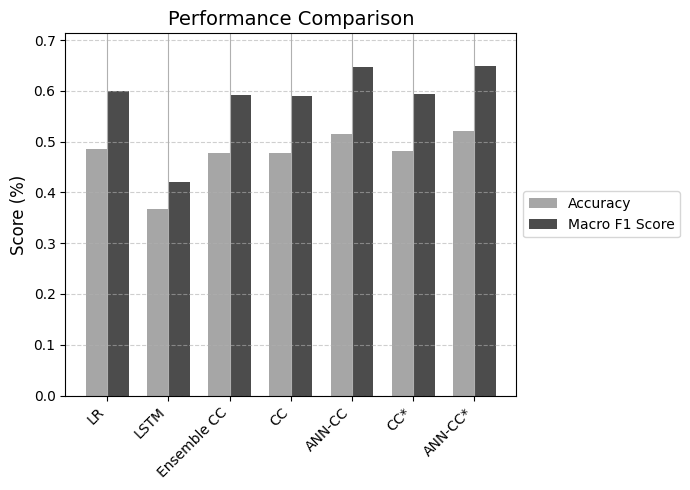

In [8]:
import numpy as np
import matplotlib.pyplot as plt

model_scores = [lr_ml_acc, lstm_ml_acc, ensemble_ml_acc, cc_ml_acc, ann_ml_acc, cc_ml_acc_specific, ann_cc_ml_acc_specific]
jaccard_scores = [lr_f1, lstm_f1, ensemble_f1, cc_f1, ann_f1, cc_f1_specific, ann_cc_f1_specific]  # Replace with actual Jaccard scores

model_names = [
    "LR",
    "LSTM",
    "Ensemble CC",
    "CC",
    "ANN-CC",
    "CC*",
    "ANN-CC*"
]

x_pos = np.arange(len(model_names))  # Position for each group

fig, ax = plt.subplots(figsize=(7, 5))
bar_width = 0.35  # Width of each bar
ax.grid(True)

# Accuracy bars
ax.bar(x_pos - bar_width / 2, model_scores, bar_width, label="Accuracy", color="gray", alpha=0.7)

# F1 bars
ax.bar(x_pos + bar_width / 2, jaccard_scores, bar_width, label="Macro F1 Score", color="black", alpha=0.7)

# Customizations
ax.grid(True, axis='y', linestyle='--', alpha=0.6)
ax.set_title("Performance Comparison", fontsize=14)
ax.set_xticks(x_pos)
ax.set_xticklabels(model_names, rotation=45, ha="right")
ax.set_ylabel("Score (%)", fontsize=12)
ax.set_ylim([0, max(max(model_scores), max(jaccard_scores)) * 1.1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

plt.tight_layout()
plt.show()